### ACTIVIDAD: Implementación de la red Percpetron Multicapa 

        Introducción

<div style="text-align: justify;">
Para la siguiente actividad, se decidio por cambiar el dataset utilizado para la evaluación por un dataset referente al tema del cáncer de mama, en donde se cuenta con unicamente dos categorías: Maligno y Benigno. Por medio de esta actividad, se compararan los resultados obtenidos de la Regresión Logista por medio de las ecuaciones, la Regresión Logista por medio de la librería de SKlearn, la validación cruzada K-Fold, y la red Perceptron Multicapa.
</div>

        Justificación
<div style="text-align: justify;">
Por medio de esta actividad, se pueden reafirmar los temas vistos en clase con el fin de tener una mejor comprensión de ellos. Asi bien, cada una de las técnicas a implementar en esta actividad pueden tener sus pros y sus contras dependiendo del problema a tratar.
</div>

        Código

Declaración de las librerias

In [473]:
##Librerias
import sys
import seaborn as sns
import random
import pandas as pd
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Deep Learning')

Mounted at /content/drive


Importar la base de datos

La base de datos a utilizar para esta actividad es el conjunto de datos de Wisconsin (diagnóstico) de cáncer de mama. Esta base de datos contiene los siguientes atributos:

1.   Número de identificación
2.   Diagnóstico (M = maligno, B = benigno)

Se calculan diez características de valor real para cada núcleo celular:

- Radio (media de las distancias desde el centro a los puntos del perímetro)
- Textura (desviación estándar de los valores de la escala de grises)
- Perímetro
- Área
- Uniformidad (variación local en las longitudes del radio)
- Compacidad (perímetro^2 / área - 1.0)
- Concavidad (severidad de las porciones cóncavas del contorno)
- Puntos cóncavos (número de porciones cóncavas del contorno)
- Simetría
- Dimensión fractal ("aproximación de la línea de costa" - 1)

La distribución de clases en esta base de datos es: 357 benignos, 212 malignos



In [474]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Pre procesamiento
<div style="text-align: justify;">
Por medio, del metodo describe() se puede conocer el calculo de algunos datos estadísticos como puede ser el percentil, la media y el estándar de los valores numéricos del conjunto de datos a utilizar.
</div>

In [475]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


En la siguiente línea se removio las columnas "Unnamed:32" y "id". Asi bien, se cambio de la columna "diagnosis" la letra M por el valor '1' y la letra B por el valor '0'.

In [476]:
data = data.drop(['Unnamed: 32', 'id'], axis = 1)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [477]:
#x_hist=data.iloc[:,[2,3,4,5,6,7,10,11,22,23,24,27,28,29,30,31]]

Histogramas de las columnas de la base de datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f765a25bc90>,
      dtype=object)

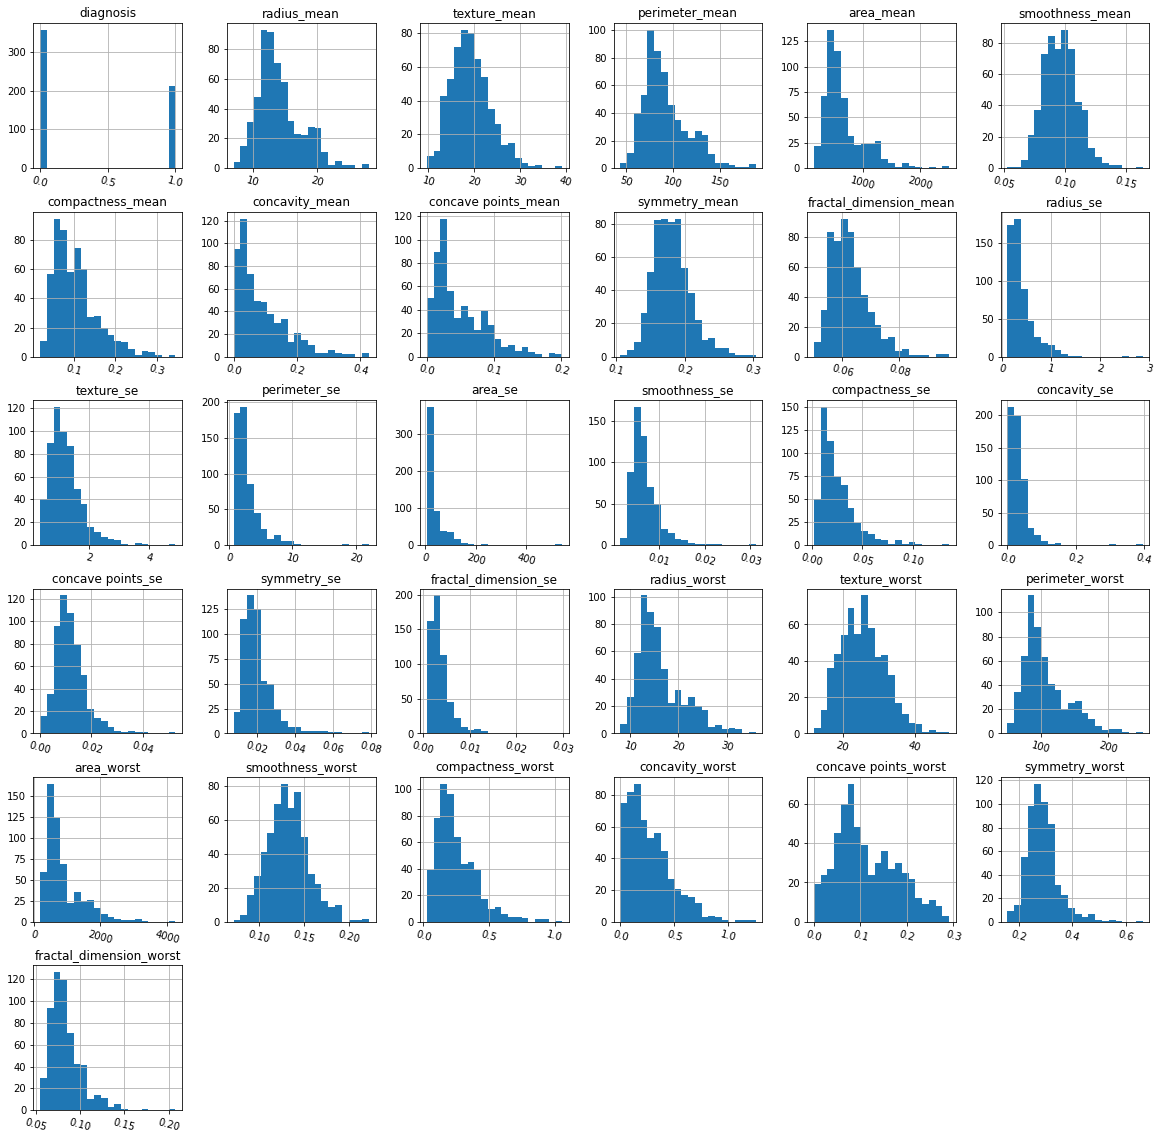

In [478]:
data.hist(bins=20,figsize=([20,20]),xrot=-15)

Tamaño de la base de datos

In [479]:
data.shape

(569, 31)

In [480]:
colnames=['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

Mapa de Correlación

In [481]:
def mapa_de_calor_correlacion(data):
    correlaciones = data[colnames].corr()
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();

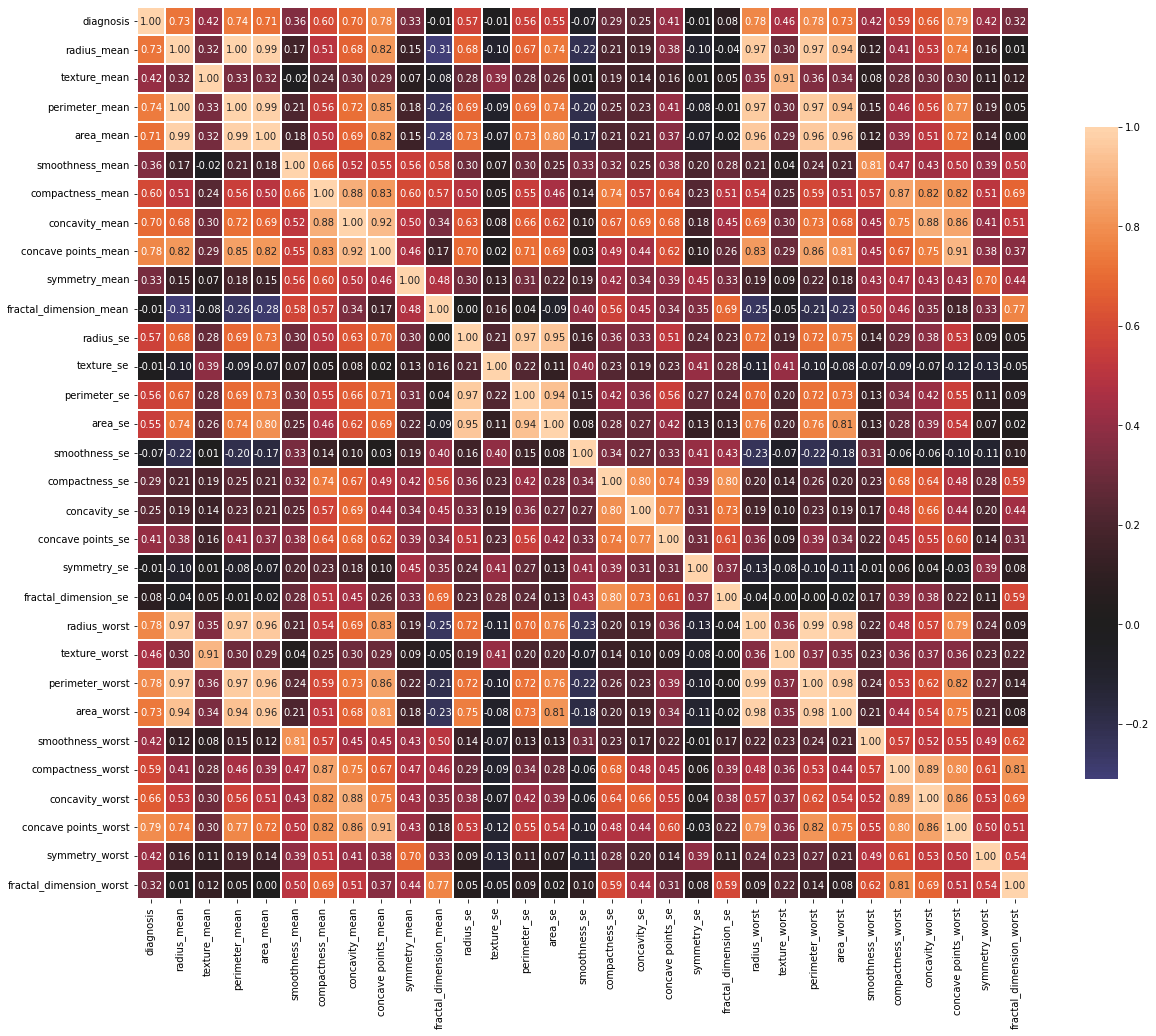

In [482]:
mapa_de_calor_correlacion(data)

El siguiente mapa de correlación se realizó en base a las gráficas de histograma anteriores, en donde se seleccionaron las columnas que tuvieran un histograma que abarcará un mayor rango en el eje de las x. 

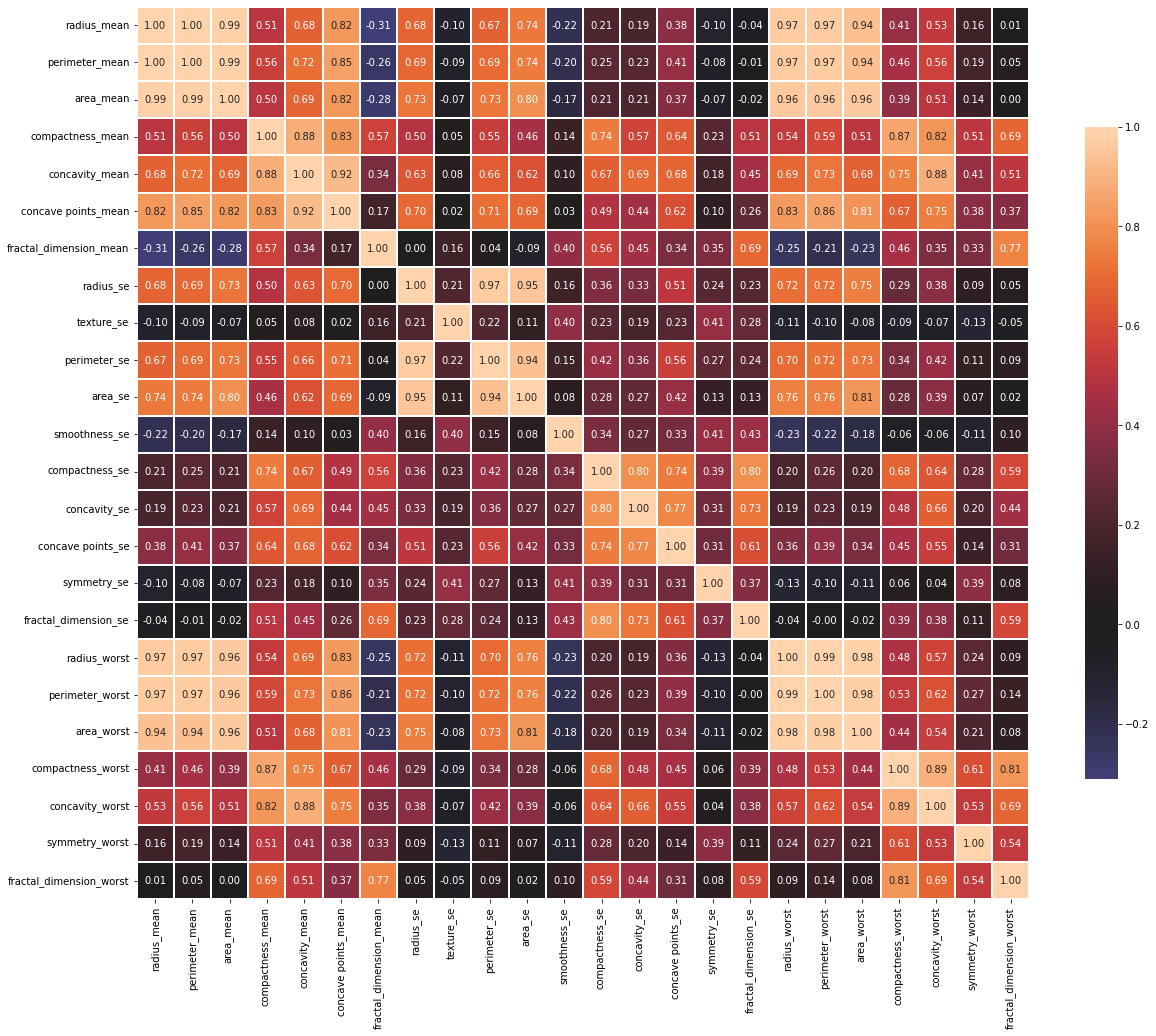

In [483]:
colnames=['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','perimeter_worst','area_worst','compactness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst']
mapa_de_calor_correlacion(data)

Para la realización del siguiente mapa de correlación, se seleccionaron los recuadros con un valor muy cercano a 1.  

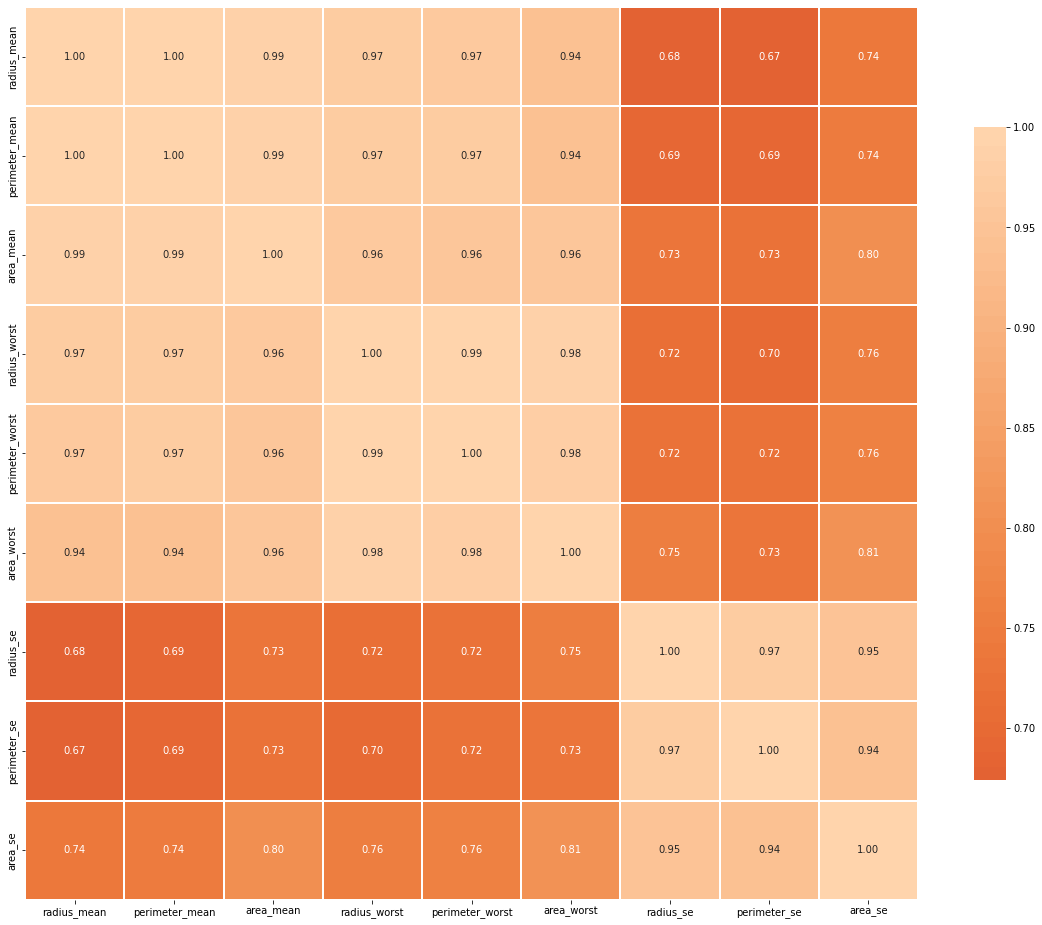

In [484]:
colnames=['radius_mean','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','radius_se','perimeter_se','area_se']
mapa_de_calor_correlacion(data)

Gráficas con respecto a la columna "diagnosis" 

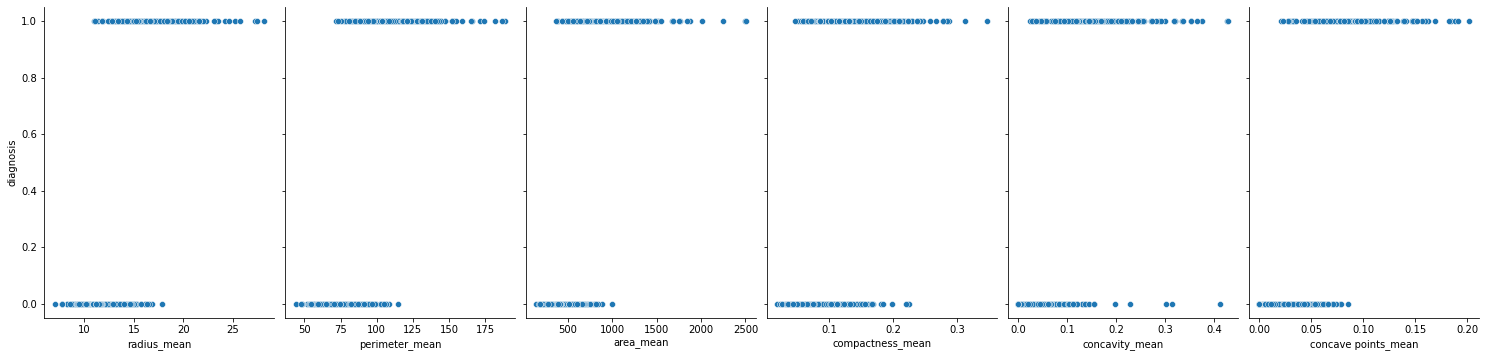

In [485]:
sns.pairplot(data,x_vars=['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean'], y_vars='diagnosis',height=5,aspect=0.7)

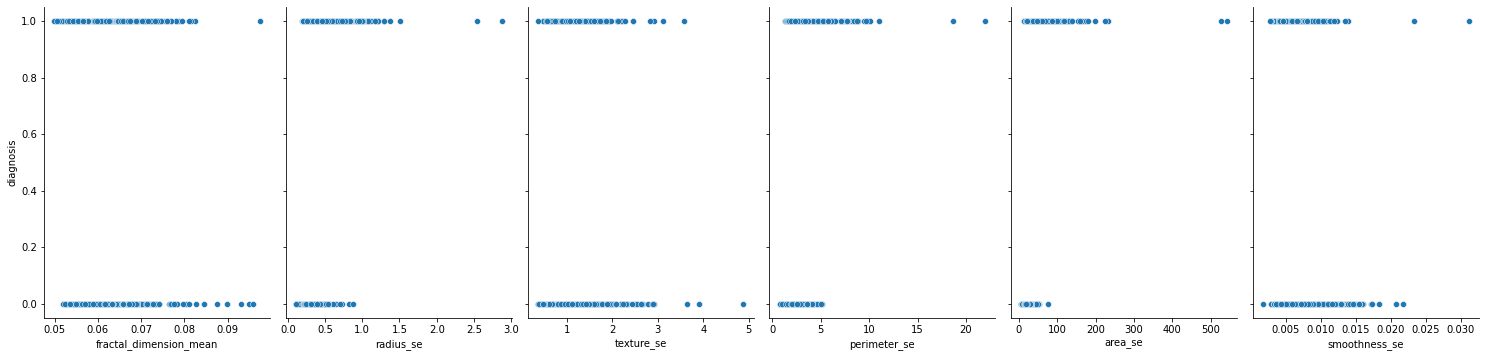

In [486]:
sns.pairplot(data,x_vars=['fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se'], y_vars='diagnosis',height=5,aspect=0.7)

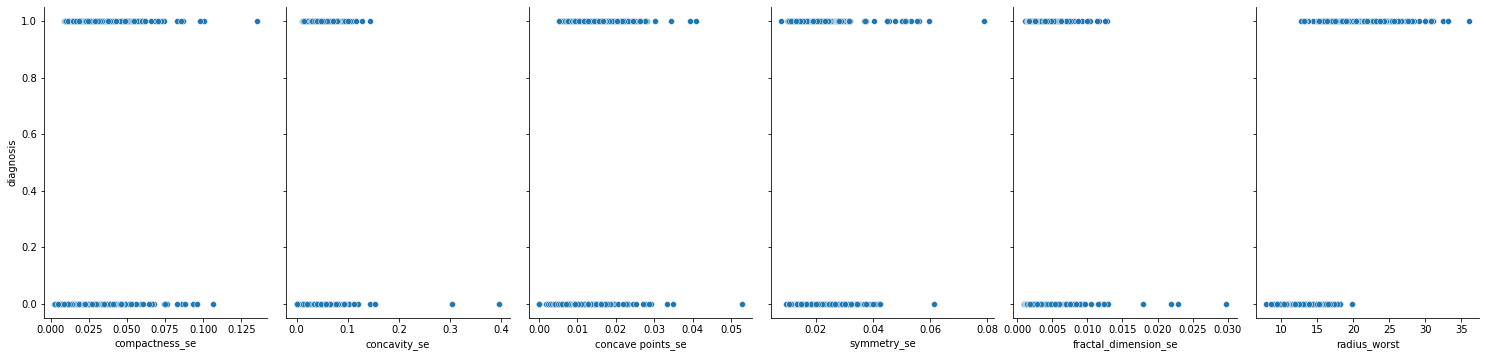

In [487]:
sns.pairplot(data,x_vars=['compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst'], y_vars='diagnosis',height=5,aspect=0.7)

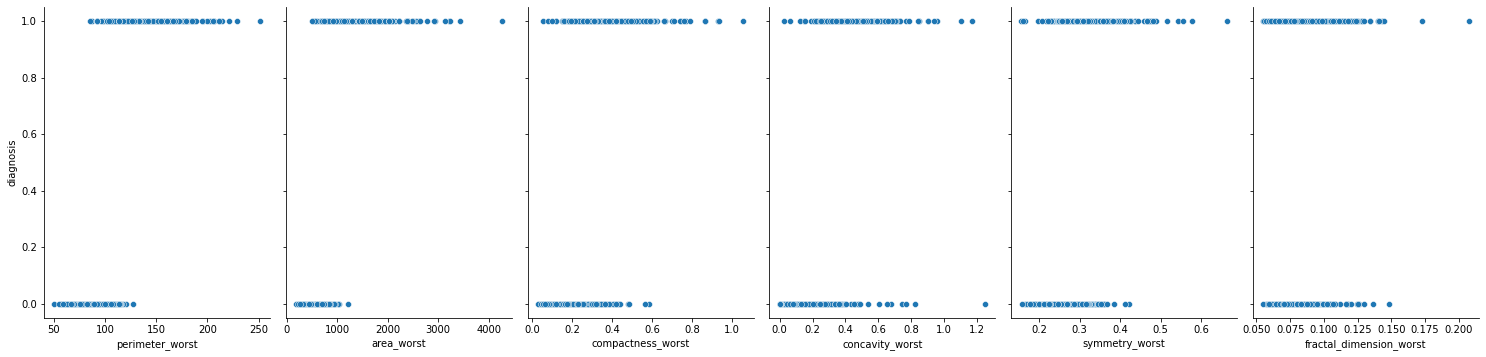

In [488]:
sns.pairplot(data,x_vars=['perimeter_worst','area_worst','compactness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst'], y_vars='diagnosis',height=5,aspect=0.7)

Visualización de los datos a utilizar del conjunto de datos X y Y.

In [489]:
x=data.iloc[:,[1,3,4,11,13,14,21,23,24]]
x

,radius_mean,perimeter_mean,area_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst
0,17.99,122.80,1001.0,1.0950,8.589,153.40,25.380,184.60,2019.0
1,20.57,132.90,1326.0,0.5435,3.398,74.08,24.990,158.80,1956.0
2,19.69,130.00,1203.0,0.7456,4.585,94.03,23.570,152.50,1709.0
3,11.42,77.58,386.1,0.4956,3.445,27.23,14.910,98.87,567.7
4,20.29,135.10,1297.0,0.7572,5.438,94.44,22.540,152.20,1575.0
...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,1.1760,7.673,158.70,25.450,166.10,2027.0
565,20.13,131.20,1261.0,0.7655,5.203,99.04,23.690,155.00,1731.0
566,16.60,108.30,858.1,0.4564,3.425,48.55,18.980,126.70,1124.0
567,20.60,140.10,1265.0,0.7260,5.772,86.22,25.740,184.60,1821.0


In [490]:
y = data.diagnosis.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [491]:
print(x.shape,y.shape)

(569, 9) (569,)


Normalización del conjunto de datos x

In [492]:
x_norm = (x - np.min(x))/(np.max(x) - np.min(x)).values

#### Regresión Logistica

In [494]:
Xn = np.c_[np.ones((len(x_norm),1)),x_norm] 
Xn.shape

(569, 10)

In [496]:
Yn = np.c_[y]
Yn.shape

(569, 1)

Propuesta de valores iniciales de Theta

In [498]:
theta = np.random.rand(Xn.shape[1],1)
theta.shape

(10, 1)

Se divide el conjunto de datos de entrenamiento (60,20) y el conjunto de prueba(20)

In [499]:
x_train, x_test, y_train, y_test = train_test_split(Xn, Yn, train_size = 0.8)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.75)

In [500]:
print( x_train.shape, x_val.shape, x_test.shape)
print( y_train.shape, y_val.shape, y_test.shape)

(341, 10) (114, 10) (114, 10)
(341, 1) (114, 1) (114, 1)


Declaración de las funciones a utilizar

In [501]:
def hipotesis(X,theta):
  z=(np.dot(X,theta))
  return 1/(1+(math.e**-z))

In [502]:
def MSE(X,Y,theta):
  h=hipotesis(X,theta)
  return (1/(2*len(X)))*np.dot((h-Y).T , (h-Y))

In [503]:
def GD(X,Y,theta, alpha, iteraciones):
  for i in range(iteraciones):
    h=hipotesis(X,theta)
    gradiente = (1/(len(X)))*np.dot(X.T, h-Y)
    theta -= alpha * gradiente
    print('iteracion:',i,'MSE:',MSE(X,Y,theta))
  return theta

En la siguiente línea se realizará la ejecución de la regresión logistica por medio de las funciones anteriores, en donde se define el número de iteraciones así como el valor de alpha. 

In [504]:
ThetaFinales = GD(x_train,y_train,theta, alpha=0.5, iteraciones=100)

iteracion: 0 MSE: [[0.13448536]]
iteracion: 1 MSE: [[0.12249424]]
iteracion: 2 MSE: [[0.11320628]]
iteracion: 3 MSE: [[0.10620931]]
iteracion: 4 MSE: [[0.10101141]]
iteracion: 5 MSE: [[0.09715392]]
iteracion: 6 MSE: [[0.0942606]]
iteracion: 7 MSE: [[0.09204553]]
iteracion: 8 MSE: [[0.0903016]]
iteracion: 9 MSE: [[0.08888333]]
iteracion: 10 MSE: [[0.08769043]]
iteracion: 11 MSE: [[0.08665462]]
iteracion: 12 MSE: [[0.08572967]]
iteracion: 13 MSE: [[0.08488444]]
iteracion: 14 MSE: [[0.08409791]]
iteracion: 15 MSE: [[0.08335589]]
iteracion: 16 MSE: [[0.08264875]]
iteracion: 17 MSE: [[0.08196992]]
iteracion: 18 MSE: [[0.08131487]]
iteracion: 19 MSE: [[0.0806804]]
iteracion: 20 MSE: [[0.08006428]]
iteracion: 21 MSE: [[0.07946486]]
iteracion: 22 MSE: [[0.07888091]]
iteracion: 23 MSE: [[0.07831147]]
iteracion: 24 MSE: [[0.0777558]]
iteracion: 25 MSE: [[0.07721328]]
iteracion: 26 MSE: [[0.07668335]]
iteracion: 27 MSE: [[0.07616557]]
iteracion: 28 MSE: [[0.07565951]]
iteracion: 29 MSE: [[0.07516

Por medio de la función de error cuadratico medio se puede comprobar si los valores de Theta Finales brindan un buen resultado cercano al valor cero.

In [505]:
costo_MSE=MSE(x_val,y_val,ThetaFinales)
costo_MSE

array([[0.03810993]])

In [506]:
y_pred= hipotesis(x_test,ThetaFinales)
print('Valor esperado:',y_test[0:10].T)
print('Valor obtenido:')
print(y_pred[0:10].T)

Valor esperado: [[0 1 0 0 0 1 0 1 0 0]]
Valor obtenido:
[[0.4018246  0.91754329 0.26346979 0.31785176 0.31990965 0.64987905
  0.21848558 0.55386235 0.26643993 0.3922279 ]]


In [507]:
for i in range(114):
  if y_pred[i] > 0.5:
     y_pred[i] =1
  else:
     y_pred[i] =0

In [508]:
print('Valores esperados:')
print(y_test.T)
print('Valores obtenidos:')
print(y_pred.T)

Valores esperados:
[[0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
  1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0
  1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0
  0 1 0 0 1 1]]
Valores obtenidos:
[[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]


In [509]:
Correcto = 0
Incorrecto = 0
for i in range (114):
  if y_pred[i] == y_test[i]:
    Correcto += 1
  else : 
    Incorrecto +=  1

print('Total de predicciones de clase correcta:',Correcto)
print('Total de predicciones de clase incorrecta:',Incorrecto)

Total de predicciones de clase correcta: 105
Total de predicciones de clase incorrecta: 9


In [510]:
Exactitud = Correcto / len(y_test)  
print(Exactitud)

0.9210526315789473


#### Regresión Logistica por medio de la librería de Sklearn

In [511]:
rl = LogisticRegression()
rl.fit(Xn,Yn) 
y_pred = rl.predict(Xn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [512]:
accuracy_score(Yn, y_pred)

0.9103690685413005

#### Implementación de la validación cruzada K-Fold

In [513]:
k=10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

In [515]:
acc_score = []
for train_index , test_index in kf.split(x):
    x_train , x_test = Xn[0:341,:],Xn[341:,:]
    y_train , y_test = Yn[0:341,:],Yn[341:,:]

    model.fit(x_train,y_train)
    pred_values = model.predict(x_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [516]:
print('Precisión de cada subconjunto - {}'.format(acc_score))
print('Promedio de la precisión : {}'.format(avg_acc_score))

Precisión de cada subconjunto - [0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473]
Promedio de la precisión : 0.9210526315789471


In [517]:
print(classification_report(y_test, pred_values))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       173
           1       0.80      0.89      0.84        55

    accuracy                           0.92       228
   macro avg       0.88      0.91      0.90       228
weighted avg       0.93      0.92      0.92       228



In [518]:
confusion_matrix = confusion_matrix(y_test, pred_values)
print(confusion_matrix)

[[161  12]
 [  6  49]]


#### Perceptron Multicapa

In [521]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
print('x_train:',x_train.shape,'y_train:', y_train.shape)
print('x_test:',x_test.shape,'y_test:',y_test.shape)

x_train: (455, 9) y_train: (455,)
x_test: (114, 9) y_test: (114,)


Normalización

In [522]:
x_train_norm = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train)).values
x_test_norm = (x_test - np.min(x_test))/(np.max(x_test) - np.min(x_test)).values

División del dataset

In [523]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.75)

In [524]:
print('x_train:', x_train.shape)
print('x_val:', x_val.shape) 
print('x_test:', x_test.shape)
print("")
print('y_train:', y_train.shape) 
print('y_val:',y_val.shape)  
print('y_test:',y_test.shape)

x_train: (341, 9)
x_val: (114, 9)
x_test: (114, 9)

y_train: (341,)
y_val: (114,)
y_test: (114,)


Cambiando etiquetas a codificación "one hot"

In [527]:
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

Creación del Modelo

In [530]:
model = Sequential()
model.add(Dense(2, input_shape=(9,), activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

Prueba Perceptron Multicapa

In [532]:
inputs = Input(shape=(9,)) #x_train(,9)
x = Dense(4, activation='sigmoid')(inputs)
x = Dense(8, activation='sigmoid')(x)
x = Dense(4, activation='sigmoid')(x)
x = Dense(2, activation='softmax')(x)

model=Model(inputs=inputs,outputs=x)

In [533]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_92 (Dense)            (None, 4)                 40        
                                                                 
 dense_93 (Dense)            (None, 8)                 40        
                                                                 
 dense_94 (Dense)            (None, 4)                 36        
                                                                 
 dense_95 (Dense)            (None, 2)                 10        
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [534]:
model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate =0.5),metrics=['accuracy'])

In [535]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=50, batch_size=8, verbose=1)

Epoch 1/50
43/43 [==============================] - 1s 7ms/step - loss: 0.6593 - accuracy: 0.6393 - val_loss: 0.7630 - val_accuracy: 0.6053
Epoch 2/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5982 - val_loss: 0.7031 - val_accuracy: 0.6053
Epoch 3/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6334 - val_loss: 0.6949 - val_accuracy: 0.6053
Epoch 4/50
43/43 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.6334 - val_loss: 0.7554 - val_accuracy: 0.3947
Epoch 5/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.6158 - val_loss: 0.6712 - val_accuracy: 0.6053
Epoch 6/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6217 - val_loss: 0.6722 - val_accuracy: 0.6053
Epoch 7/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.6158 - val_loss: 0.7213 - val_accuracy: 0.6053
Epoch 8/50
43/43 [==

In [536]:
pred = model.predict(x_test)
print(pred)
print(pred.shape)
print(" ")
pred = np.argmax(pred,axis=1) #nos da el indice de un elemento de un vector máximo 
print(pred)
print(pred.shape)
label=np.argmax(y_test,axis=1)

[[0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]
 [0.64995414 0.35004583]


Evaluación de la red entrenada

In [537]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6588463187217712
Test accuracy: 0.6315789222717285


### Resultados

<div style="text-align: justify;">
Por medio de esta actividad se pudieron comparar los resultados obtendios en cada método utilizado, en donde se pudieron obsevar varios puntos por medio de la siguiente tabla. El primer punto es que se tuvieron dos metodos con la mejor precisión: el método de la Validación cruzada K-Fold y el método de la Regresión Logística. Así bien, el método de la Regresión Logística realizada por medio de las funciones propuestas en clase obtuvo un resultado con una mejor precisión que el método de la Regresión Logística por medio de la librería Sklearn. De igual manera, se puede observar que no se obtuvo un buen resultado por medio de la red Perceptron Multicapa, en donde el valor más alto alcanzado fue de 0.63157.
</div>

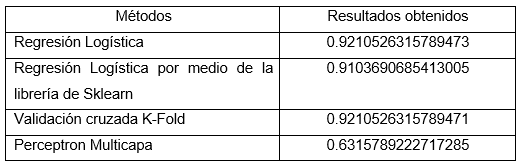

### Referencias Bibliográficas



Data Science Team (2020) Validación cruzada K-Fold. Recuperado el 03 de Marzo de 2022 de 
https://datascience.eu/es/aprendizaje-automatico/validacion-cruzada-de-k-fold/

DelftStack.(2020)Cómo configurar manualmente el tamaño de los contenedores en el histograma Matplotlib. Recuperado el día 04 de Marzo de 2022 de https://www.delftstack.com/es/howto/matplotlib/-how-to-manually-set-the-size-of-the-bins-in-matplotlib/

DelftStack(2021) Dividir DataFrame de Pandas. Recuperado el 04 de Marzo de 2022 de https://www.delftstack.com/es/howto/python-pandas/split-pandas-dataframe/

Geeksforgeeks.(2022) ML | Kaggle Breast Cancer Wisconsin Diagnosis using Logistic Regression. Recuperado el 04 de Marzo del 2022 de  https://www.geeksforgeeks.org/ml-kaggle-breast-cancer-wisconsin-diagnosis-using-logistic-regression/

Kaggle(2017) Breast Cancer Wisconsin (Diagnostic) Data Set. Recuperado el día 03 de Marzo de 2022 de https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Scikit learn.(s.f) sklearn.linear_model.LogisticRegression Recuperado el 03 de Marzo de 2022 de https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
